In [1]:
import pandas as pd
import numpy as np
import csv
import requests
from pwd import credenciales

In [2]:
data = {
    'token': credenciales.get("SECRET_KEY"),
    'content': 'report',
    'format': 'csv',
    'report_id': '114',
    'csvDelimiter': ';',
    'rawOrLabel': 'raw',
    'rawOrLabelHeaders': 'raw',
    'exportCheckboxLabel': 'true',
    'returnFormat': 'csv'
}
r = requests.post('https://redcap.infant.org.ar/es/api/',data=data)
print('HTTP Status: ' + str(r.status_code))
lines = r.text.splitlines()
reader = csv.reader(lines)
for row in reader:
    with open('filiales.csv', 'w', newline='', encoding="utf-8") as csvfile:
        spamwriter = csv.writer(csvfile,quotechar=',')
        for row in reader:
            spamwriter.writerow(row)  


HTTP Status: 200


In [3]:
df=pd.read_csv('filiales.csv', sep=';', names=['record','hospital', 'areaprog', 'partido', 'localidad', 'calle','altura', 'entre1', 'entre2', 'cp', 'usuario'])
df.head()

,,record,hospital,areaprog,partido,localidad,calle,altura,entre1,entre2,cp,usuario
aaa-195-2018-00,4.0,2018-07-10,0.0,1.0,101.0,solano,829,2033.0,NaN,NaN,1881.0,gsanluis
aaa-264-2020-00,3.0,2020-05-09,1.0,1.0,13.0,berazategui,110,1131.0,NaN,NaN,1884.0,agraziano
aaa-264-2020-01,3.0,2020-10-22,0.0,1.0,13.0,berazategui,110,1131.0,NaN,NaN,1884.0,agraziano
aaa-306-2019-00,1.0,2019-05-13,0.0,1.0,66.0,la plata,37,1865.0,NaN,NaN,1900.0,mstefano
aaa-337-2022-00,4.0,2022-10-18,0.0,1.0,13.0,berazategui,26,6058.0,NaN,NaN,1884.0,gsanluis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11604 entries, ('aaa-195-2018-00', 4.0) to ('zyf-780-2023-00', 3.0)
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   record     11576 non-null  object 
 1   hospital   11585 non-null  float64
 2   areaprog   11506 non-null  float64
 3   partido    11542 non-null  float64
 4   localidad  11524 non-null  object 
 5   calle      11490 non-null  object 
 6   altura     9903 non-null   float64
 7   entre1     2403 non-null   object 
 8   entre2     1377 non-null   object 
 9   cp         11458 non-null  float64
 10  usuario    11604 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.3+ MB


In [5]:
df.drop(['areaprog', 'usuario'],axis=1, inplace=True)
df.head()

,,record,hospital,partido,localidad,calle,altura,entre1,entre2,cp
aaa-195-2018-00,4.0,2018-07-10,0.0,101.0,solano,829,2033.0,NaN,NaN,1881.0
aaa-264-2020-00,3.0,2020-05-09,1.0,13.0,berazategui,110,1131.0,NaN,NaN,1884.0
aaa-264-2020-01,3.0,2020-10-22,0.0,13.0,berazategui,110,1131.0,NaN,NaN,1884.0
aaa-306-2019-00,1.0,2019-05-13,0.0,66.0,la plata,37,1865.0,NaN,NaN,1900.0
aaa-337-2022-00,4.0,2022-10-18,0.0,13.0,berazategui,26,6058.0,NaN,NaN,1884.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11604 entries, ('aaa-195-2018-00', 4.0) to ('zyf-780-2023-00', 3.0)
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   record     11576 non-null  object 
 1   hospital   11585 non-null  float64
 2   partido    11542 non-null  float64
 3   localidad  11524 non-null  object 
 4   calle      11490 non-null  object 
 5   altura     9903 non-null   float64
 6   entre1     2403 non-null   object 
 7   entre2     1377 non-null   object 
 8   cp         11458 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


In [7]:
df.localidad=df.localidad.str.strip().str.lower().str.replace(" ", "_")
df.calle=df.calle.str.strip().str.lower().str.replace(" ", "_")
df.entre1=df.entre1.str.strip().str.lower().str.replace(" ", "_")
df.entre2=df.entre2.str.strip().str.lower().str.replace(" ", "_")
df.head()


,,record,hospital,partido,localidad,calle,altura,entre1,entre2,cp
aaa-195-2018-00,4.0,2018-07-10,0.0,101.0,solano,829,2033.0,NaN,NaN,1881.0
aaa-264-2020-00,3.0,2020-05-09,1.0,13.0,berazategui,110,1131.0,NaN,NaN,1884.0
aaa-264-2020-01,3.0,2020-10-22,0.0,13.0,berazategui,110,1131.0,NaN,NaN,1884.0
aaa-306-2019-00,1.0,2019-05-13,0.0,66.0,la_plata,37,1865.0,NaN,NaN,1900.0
aaa-337-2022-00,4.0,2022-10-18,0.0,13.0,berazategui,26,6058.0,NaN,NaN,1884.0


In [8]:
df['localidad'] = df.localidad.str.replace(r'\b_$', '', regex=True).str.strip()
df['calle'] = df.calle.str.replace(r'\b_$', '', regex=True).str.strip()
df['entre1'] = df.entre1.str.replace(r'\b_$', '', regex=True).str.strip()
df['entre2'] = df.entre2.str.replace(r'\b_$', '', regex=True).str.strip()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11604 entries, ('aaa-195-2018-00', 4.0) to ('zyf-780-2023-00', 3.0)
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   record     11576 non-null  object 
 1   hospital   11585 non-null  float64
 2   partido    11542 non-null  float64
 3   localidad  11524 non-null  object 
 4   calle      11490 non-null  object 
 5   altura     9903 non-null   float64
 6   entre1     2403 non-null   object 
 7   entre2     1377 non-null   object 
 8   cp         11458 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


In [10]:
#pd.set_option('display.max_rows', None)

In [11]:
df.localidad.value_counts()

localidad
moreno                   757
los_hornos               726
villa_elvira             660
florencio_varela         524
merlo                    499
                        ... 
manuel_alberti             1
vila_elvira                1
los_troncos_del_talar      1
jocpaz                     1
s_justo                    1
Name: count, Length: 462, dtype: int64

In [12]:
sorted(dict(df.localidad.value_counts()).items())

[('0', 1),
 ('1714', 1),
 ('25_de_mayo', 1),
 ('3_de_feb', 1),
 ('817', 1),
 ('9_de_abril', 9),
 ('9_de_julio', 3),
 ('abasto', 158),
 ('adrogue', 18),
 ('alberdi', 1),
 ('alberti', 1),
 ('aldo_bonzi', 2),
 ('alejandro_kord', 1),
 ('alejandro_korn', 53),
 ('almirane_brown', 1),
 ('almirante_brown', 47),
 ('alto_de_san_lorenzo', 1),
 ('altos_de_san_lorenxo', 1),
 ('altos_de_san_lorenzo', 441),
 ('altos_de_san_lornzo', 1),
 ('altos_de_san_lroeno', 1),
 ('altos_de_san_lroenzo', 1),
 ('altos_de_sn_lorenzo', 1),
 ('altos_e_san_lorenzo', 1),
 ('alñtos_de_san_lorenzo', 1),
 ('america', 1),
 ('arana', 42),
 ('arrecifes', 1),
 ('arturo_segui', 44),
 ('asentamiento_rodrigo_bueno', 1),
 ('asentamiento_zabaleta', 1),
 ('atalaya', 2),
 ('avellaneda', 107),
 ('b_vista', 3),
 ('bahia_blanca', 1),
 ('balvanera', 4),
 ('banfield', 8),
 ('barracas', 11),
 ('barracas_(villa_21-24)', 1),
 ('barrio_15', 8),
 ('barrio_1_11_14', 1),
 ('barrio_20', 2),
 ('barrio_21_24', 11),
 ('barrio_5_de_mayo', 1),
 ('barri

In [13]:
df.calle.value_counts()

calle
18                              47
28                              44
524                             42
149                             41
52                              41
                                ..
barrio_rene_favaloro_manzana     1
el_chacho                        1
cucha-cucha                      1
andres_argibel                   1
avenida_vergara                  1
Name: count, Length: 3697, dtype: int64

In [14]:
sorted(dict(df.calle.value_counts()).items())

[('0', 29),
 ('00', 1),
 ('1', 25),
 ('10', 18),
 ('100', 2),
 ('102', 1),
 ('104', 3),
 ('1042_patagones', 1),
 ('105', 2),
 ('105_manzana', 1),
 ('106', 2),
 ('107', 1),
 ('108', 3),
 ('108_bis', 1),
 ('10_de_noviembre', 1),
 ('11', 20),
 ('110', 3),
 ('112', 4),
 ('1122', 2),
 ('1124', 1),
 ('1126', 1),
 ('113', 1),
 ('1130', 1),
 ('1131', 1),
 ('1132', 3),
 ('1134', 1),
 ('1136', 1),
 ('1137', 1),
 ('1138', 1),
 ('1139', 4),
 ('114', 3),
 ('1140', 1),
 ('1141', 2),
 ('1142', 1),
 ('1143', 1),
 ('1144', 2),
 ('1145', 1),
 ('1147', 3),
 ('1148', 5),
 ('114_bis', 1),
 ('115', 20),
 ('1150', 2),
 ('1151', 1),
 ('1151_a', 1),
 ('1153', 3),
 ('1153a', 1),
 ('1155', 1),
 ('115_a', 1),
 ('115_bis', 1),
 ('116', 23),
 ('116_bis', 1),
 ('117', 23),
 ('118', 27),
 ('1184', 1),
 ('118_bis', 4),
 ('119', 17),
 ('11_bis', 1),
 ('11_de_septiembre', 3),
 ('12', 21),
 ('120', 17),
 ('1201', 1),
 ('1205', 2),
 ('1208', 1),
 ('1209', 1),
 ('120_a', 1),
 ('120_bis', 1),
 ('121', 24),
 ('1211', 2),
 ('

In [15]:
df_laplata = df.loc[df["partido"]==66.0]

In [16]:
df_laplata

,,record,hospital,partido,localidad,calle,altura,entre1,entre2,cp
aaa-306-2019-00,1.0,2019-05-13,0.0,66.0,la_plata,37,1865.0,NaN,NaN,1900.0
aaa-437-2018-00,1.0,2018-06-21,0.0,66.0,melchor_romero,524,NaN,159,160,1903.0
aaa-573-2018-00,1.0,2018-12-09,0.0,66.0,tolosa,17,367.0,528,NaN,1900.0
aaa-731-2019-00,1.0,2019-06-06,0.0,66.0,altos_de_san_lorenzo,28,NaN,89,90,1901.0
aaa-942-2022-00,1.0,2022-04-15,0.0,66.0,la_plata,522,5528.0,NaN,NaN,1900.0
...,...,...,...,...,...,...,...,...,...,...
zxo-510-2021-00,1.0,2021-10-25,0.0,66.0,los_hornos,57,2927.0,NaN,NaN,1900.0
zxs-628-2018-00,1.0,2018-03-22,0.0,66.0,lisandro_olmos,41,3234.0,NaN,NaN,1901.0
zxs-628-2018-01,1.0,2018-04-14,0.0,66.0,lisandro_olmos,41,3234.0,161,160,1901.0
zxv-336-2018-00,1.0,2018-09-21,0.0,66.0,los_hornos,65,3434.0,NaN,NaN,1900.0


In [17]:
sorted(dict(df_laplata.localidad.value_counts()).items())

[('0', 1),
 ('abasto', 158),
 ('alto_de_san_lorenzo', 1),
 ('altos_de_san_lorenxo', 1),
 ('altos_de_san_lorenzo', 440),
 ('altos_de_san_lornzo', 1),
 ('altos_de_san_lroeno', 1),
 ('altos_de_san_lroenzo', 1),
 ('altos_de_sn_lorenzo', 1),
 ('altos_e_san_lorenzo', 1),
 ('alñtos_de_san_lorenzo', 1),
 ('arana', 42),
 ('arturo_segui', 44),
 ('city_bell', 84),
 ('colonia_urquiza', 3),
 ('el_carmen', 1),
 ('el_peligro', 29),
 ('el_retiro', 4),
 ('etchecerry', 1),
 ('etcheverry', 45),
 ('gonnet', 48),
 ('gorina', 26),
 ('hernandez', 2),
 ('hogar_andrea_bayeto', 1),
 ('ignacio_correas', 1),
 ('jose_hernandez', 5),
 ('l_aplata', 3),
 ('la_p', 1),
 ('la_plat', 1),
 ('la_plata', 277),
 ('lisandro_olmos', 117),
 ('los_hornos', 726),
 ('los_hornos_unidad_33', 1),
 ('lso_hornos', 1),
 ('melchor_roemro', 1),
 ('melchor_romero', 327),
 ('melcor_romero', 1),
 ('olmos', 18),
 ('poblet', 9),
 ('ringuelet', 47),
 ('rinmguelet', 1),
 ('romero', 31),
 ('san_carlos', 396),
 ('sanm_carlos', 1),
 ('sicardi', 1),

In [18]:
df_laplata.localidad.value_counts()

localidad
los_hornos               726
villa_elvira             659
altos_de_san_lorenzo     440
san_carlos               396
melchor_romero           327
la_plata                 277
tolosa                   168
abasto                   158
lisandro_olmos           117
city_bell                 84
gonnet                    48
ringuelet                 47
villa_elisa               47
etcheverry                45
arturo_segui              44
arana                     42
romero                    31
el_peligro                29
gorina                    26
olmos                     18
poblet                     9
jose_hernandez             5
el_retiro                  4
colonia_urquiza            3
l_aplata                   3
hernandez                  2
melchor_roemro             1
altos_de_sn_lorenzo        1
rinmguelet                 1
ignacio_correas            1
0                          1
etchecerry                 1
los_hornos_unidad_33       1
lso_hornos                 1
sanm

<AxesSubplot: xlabel='localidad'>

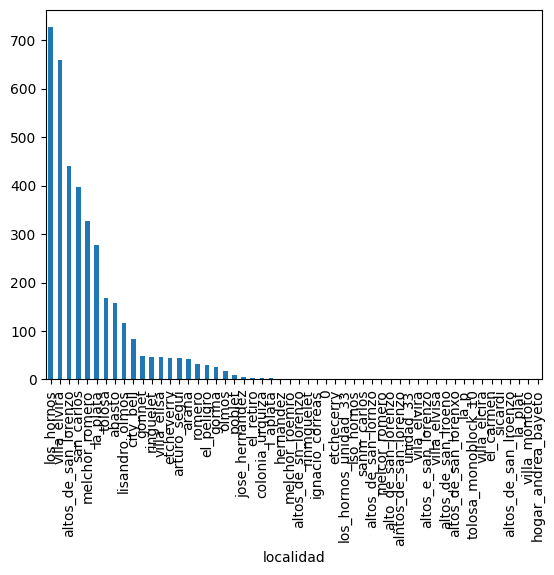

In [19]:
df_laplata.localidad.value_counts().plot.bar()